In [12]:
import pandas as pd
import numpy as np
import json
import seaborn as sns


In [13]:
with open('primed_qtable.json', 'r') as file:
    data = json.load(file)

In [14]:
data_df = pd.DataFrame(data)
data_df

,0,1,2,3,4,5,6
0,0.542800,0.776141,0.671939,0.741039,0.998368,0.189810,0.546746
1,0.914786,0.276709,0.796444,0.433375,0.440584,0.434094,0.534779
2,0.375843,0.897653,0.715633,0.683141,0.078300,0.504595,0.431218
3,0.292233,0.799342,0.991363,0.542538,0.784371,0.658333,0.805897
4,0.145482,0.701711,0.709218,0.717441,0.984679,0.348252,0.767731
...,...,...,...,...,...,...,...
5403,0.748129,0.428814,0.494416,0.388300,0.276471,0.680889,0.861378
5404,0.770741,0.360358,0.038577,0.464783,0.460832,0.473715,0.298009
5405,0.522030,0.412798,0.393387,0.039338,0.531168,0.739264,0.137260
5406,0.413785,0.054207,0.990058,0.860649,0.662790,0.448529,0.324158


In [15]:
import pickle

def load_qtable(filename="qtable.pkl"):
    with open(filename, "rb") as f:
        qtable = pickle.load(f)
    return qtable

q_table = load_qtable()

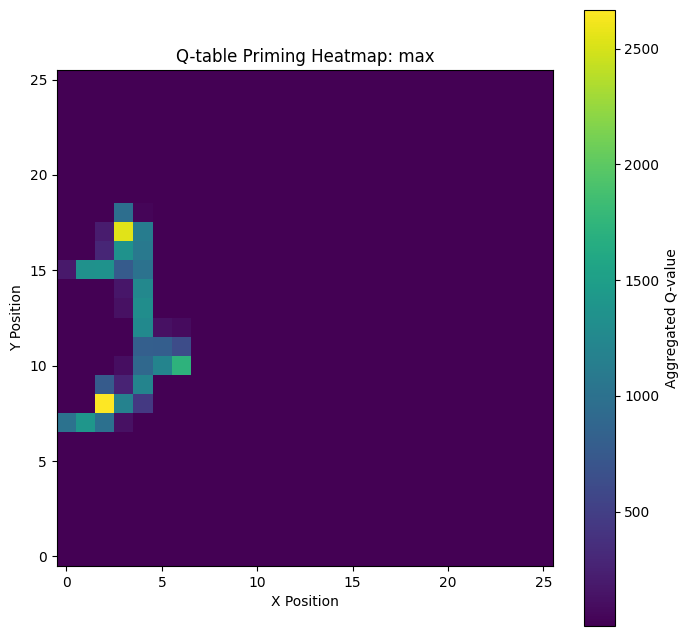

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_qtable_heatmap(qtable, mode="sum"):
    collapsed = np.zeros((26, 26))

    for x in range(26):
        for y in range(26):
            cell_value = 0
            for cart in [0, 1]:
                for items in [0, 1]:
                    for checkout in [0, 1]:
                        idx = ((((x*26 + y)*2 + cart)*2 + items)*2 + checkout)

                        if mode == "sum":
                            cell_value += qtable.loc[idx].sum()
                        elif mode == "max":
                            cell_value += qtable.loc[idx].max()
                        else:
                            raise ValueError("mode wrong")

            collapsed[x, y] = cell_value

    plt.figure(figsize=(8, 8))
    plt.imshow(collapsed.T, origin="lower", aspect="equal")
    plt.colorbar(label="Q-value")
    plt.title(f"Q-table Priming Heatmap: {mode}")
    plt.xlabel("X Position")
    plt.ylabel("Y Position")
    plt.show()

plot_qtable_heatmap(qtable=q_table, mode="max")
